In [ ]:
# Loan Approval EDA
# This project explores patterns in a loan approval dataset to identify key factors influencing loan decisions. The goal is to derive insights that could help predict future loan approvals.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('loan_approval_data.csv')
df.head(20)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [4]:
df.shape

(45000, 14)

In [5]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

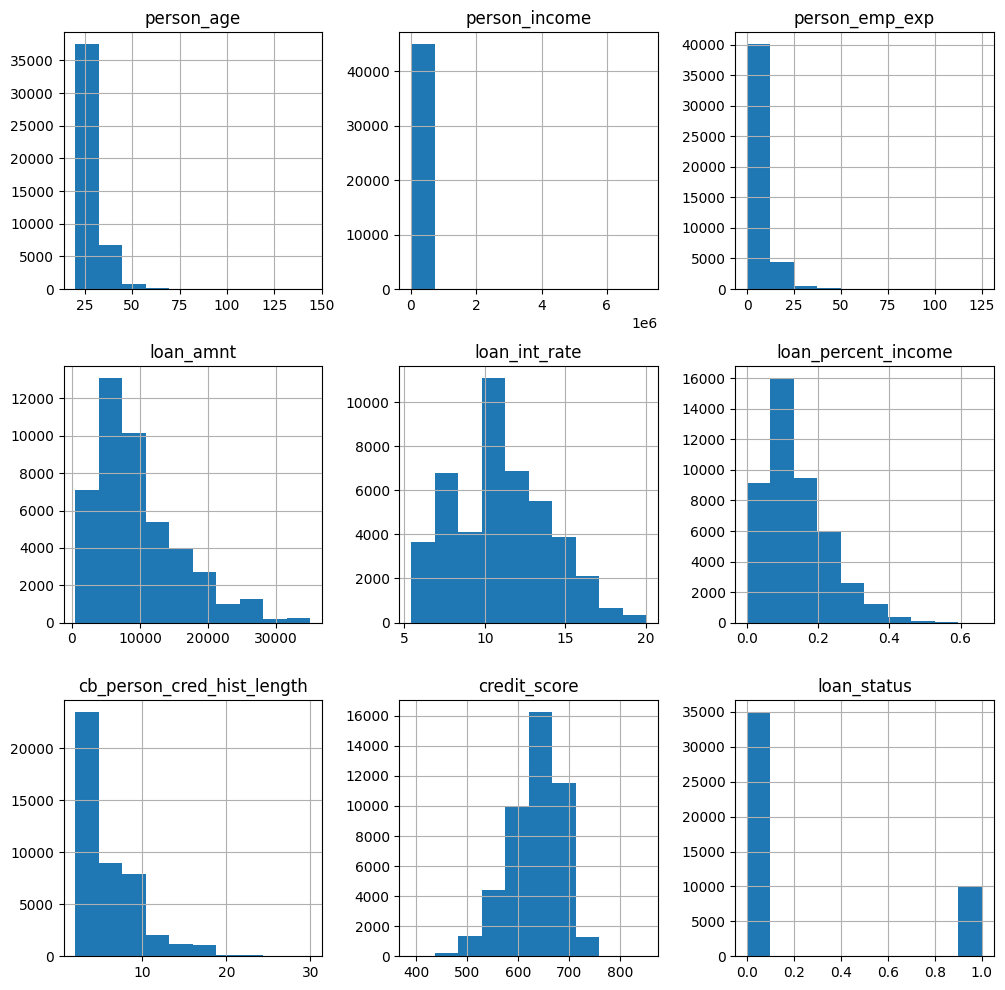

In [8]:
df.hist(figsize=(12,12))

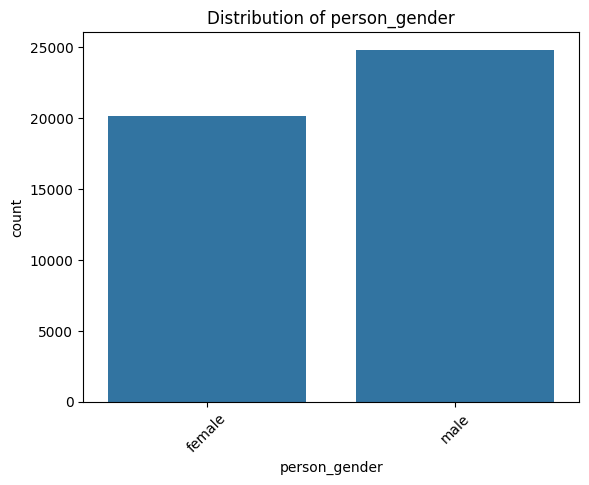

Insight: About 55% applicants are male, and 45% are female.
Reason: Males may apply for loans more frequently due to greater financial access or responsibility.


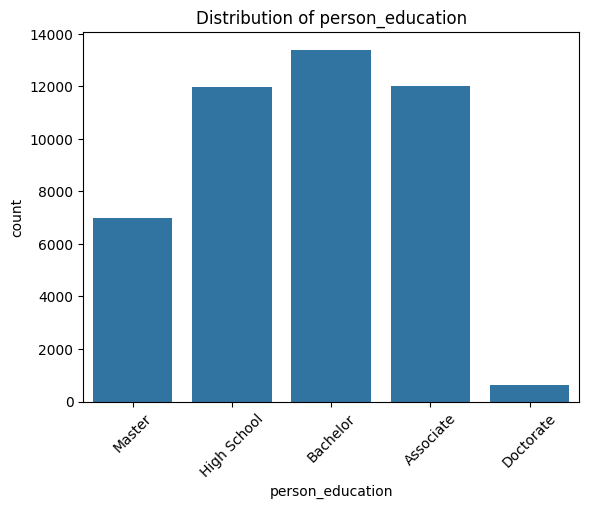

Insight: Over 29% of applicants have bachelors degree followed by those with associates and high school education.
Reason: This is because higher education improves job prospects and loan eligibility.


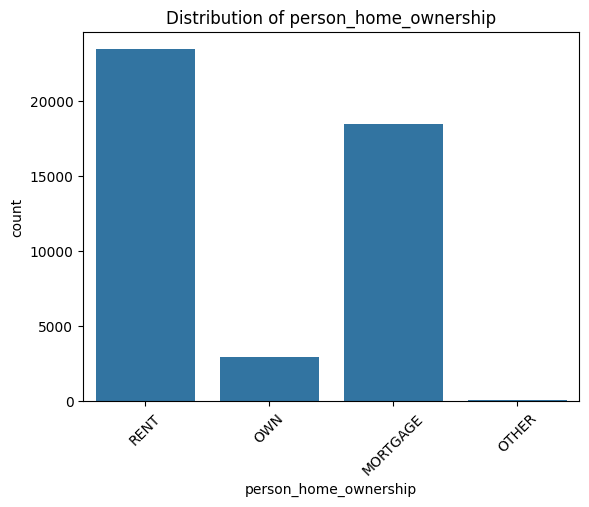

Insight: The most of the applicants are renters, followed by those with mortgages,and fewer who own thier home.
Reason: This is because owning a home signals greater financial stability and lower credit risk.


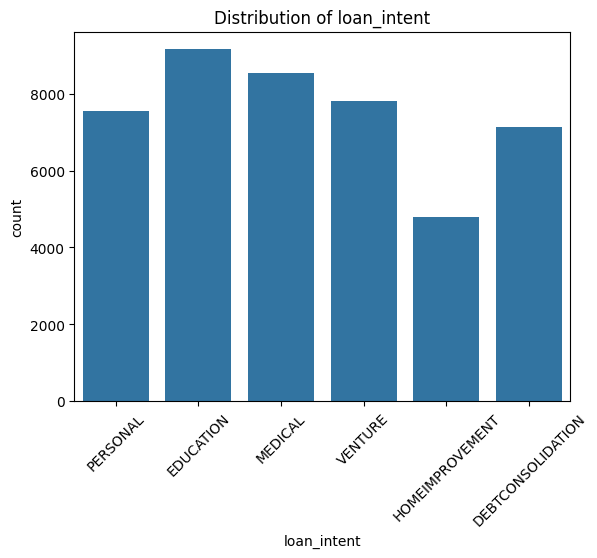

Insight: The most common loan intent among applicants is education, followed by medical, ventures, personal, etc.
Reason: Educations loans are higher because everyone is applying for education funding.


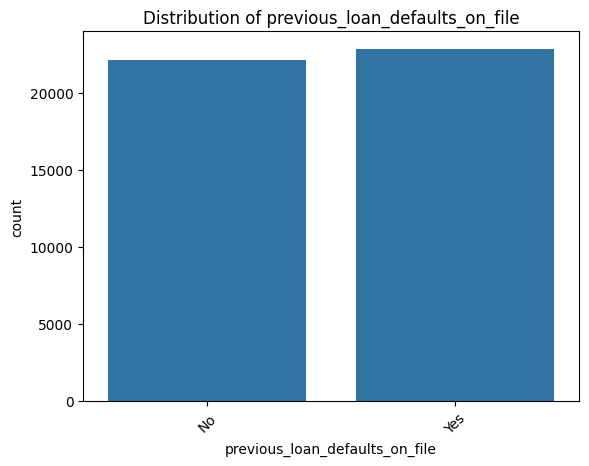

Insight: About 51% a have previous loan defaults on file.
Reason: Previous loan defaults indicate a history of repayment difficulties, which can affect an applicant’s creditworthiness.


In [59]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

    if col=='person_gender':
        print('Insight: About 55% applicants are male, and 45% are female.\nReason: Males may apply for loans more frequently due to greater financial access or responsibility.')
    elif col=='person_education':
        print('Insight: Over 29% of applicants have bachelors degree followed by those with associates and high school education.\nReason: This is because higher education improves job prospects and loan eligibility.')
    elif col=='person_home_ownership':
        print('Insight: The most of the applicants are renters, followed by those with mortgages,and fewer who own thier home.\nReason: This is because owning a home signals greater financial stability and lower credit risk.')
    elif col=='loan_intent':
        print('Insight: The most common loan intent among applicants is education, followed by medical, ventures, personal, etc.\nReason: Educations loans are higher because everyone is applying for education funding.') 
    elif col=='previous_loan_defaults_on_file':
        print('Insight: About 51% a have previous loan defaults on file.\nReason: Previous loan defaults indicate a history of repayment difficulties, which can affect an applicant’s creditworthiness.')
    elif col=='emp_exp_level':
        print('Insight: About 39% applicants are at the entry level, 23% are junior, 22% are mid and 15% are senior.\nReason: Most applicants are entry-level, likely reflecting a younger or less experienced workforce applying for loans.')

In [50]:
df['person_emp_exp'].value_counts(normalize=True)

person_emp_exp
0     0.212578
2     0.091867
1     0.090244
3     0.086444
4     0.078311
        ...   
62    0.000022
61    0.000022
58    0.000022
93    0.000022
85    0.000022
Name: proportion, Length: 63, dtype: float64

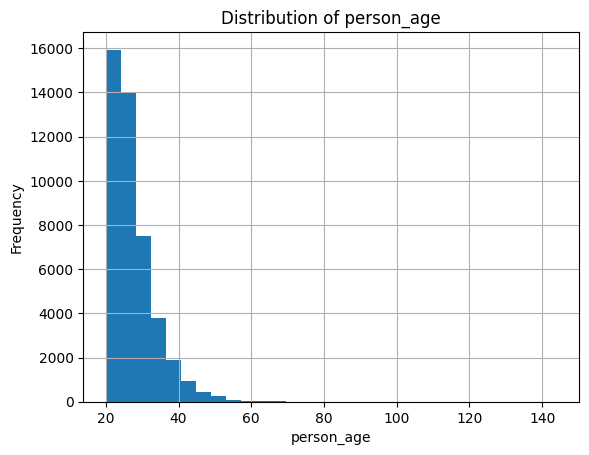

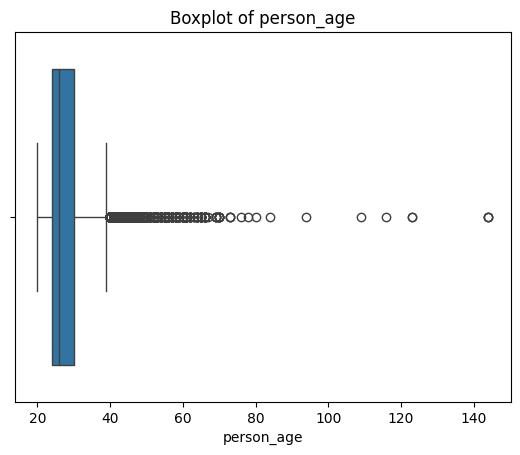

Insight: Most of the applicants are in their 20s and 30s.
Reason: Younger applicants may have lower credit histories or incomes, which could influence approval decisions.


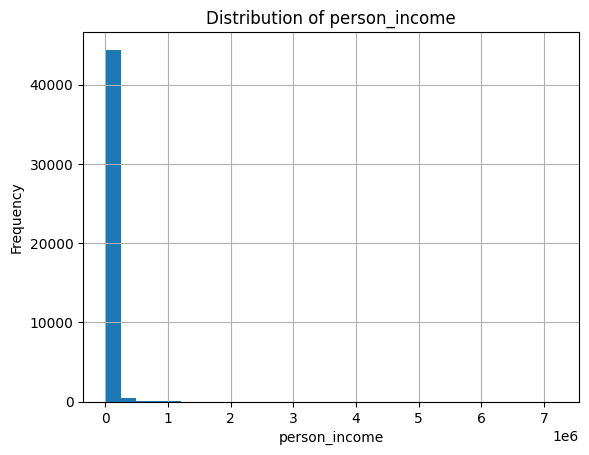

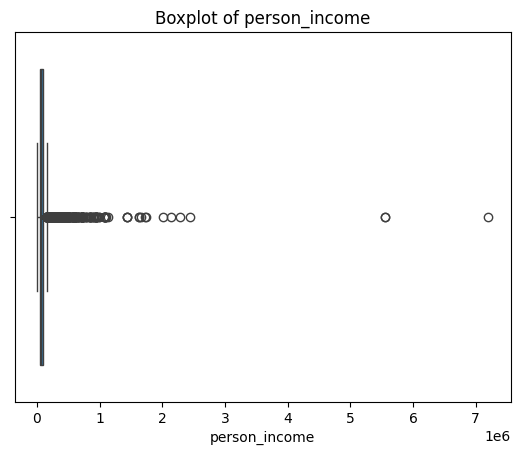

Insight: Income is highly right skewed.
Reason: Income varies widely.


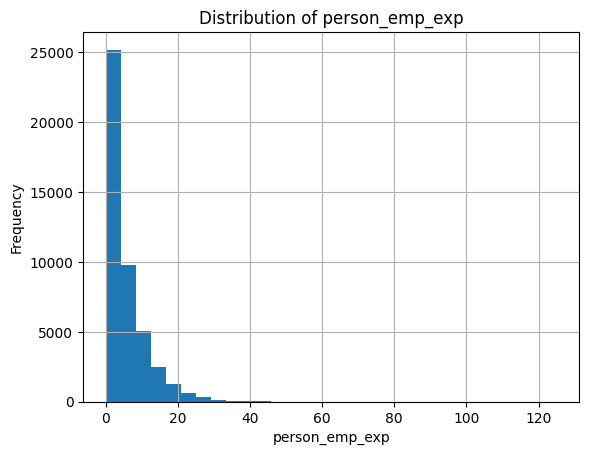

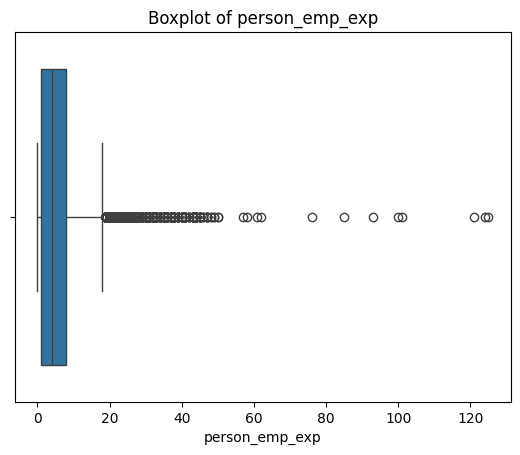

Insight: Most applicants have less experience.
Reason: Most applicants are entry-level, likely reflecting a younger or less experienced workforce applying for loans.


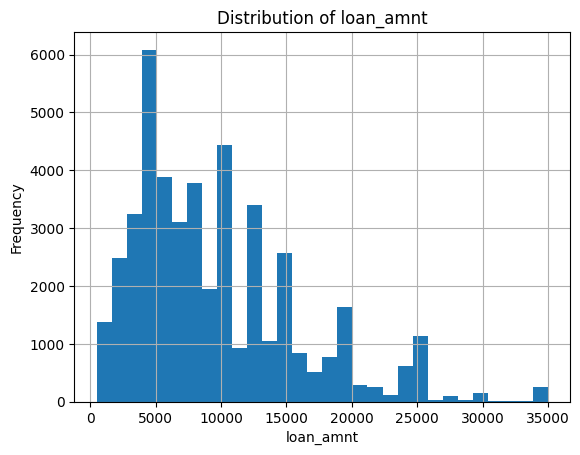

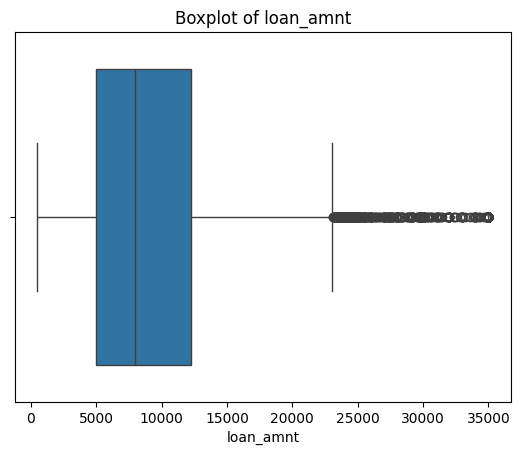

Insight: Majority of loans are under 10000.
Reason: Indicates applicants are mostly requesting small to mid-sized personal or educational loans.


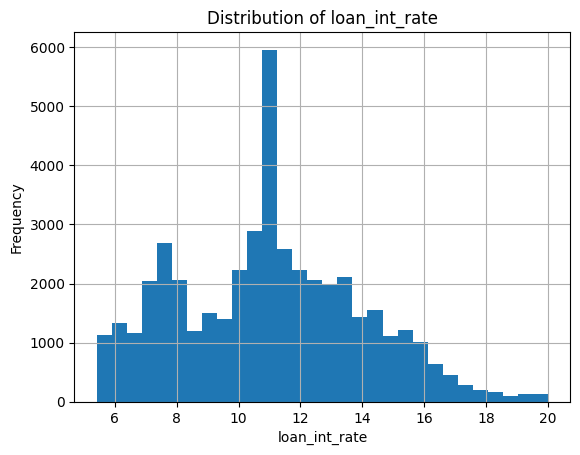

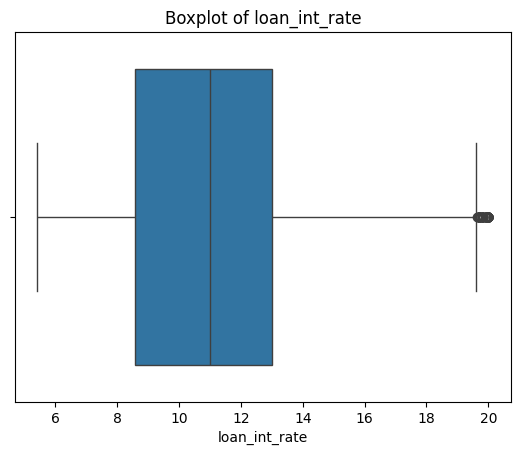

Insight: Interest rate is between 10-12.
Reason: Might be useful to study how interest rate affects loan approval.


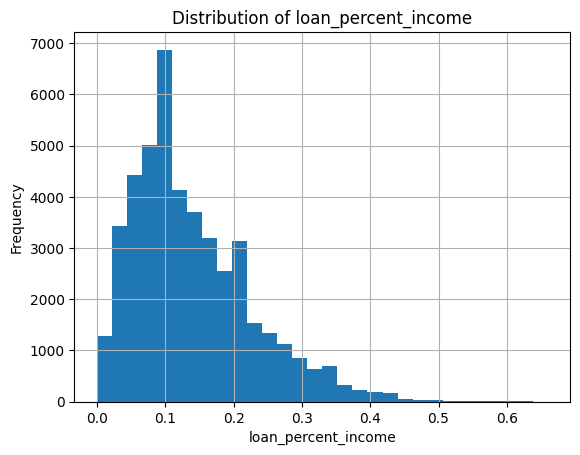

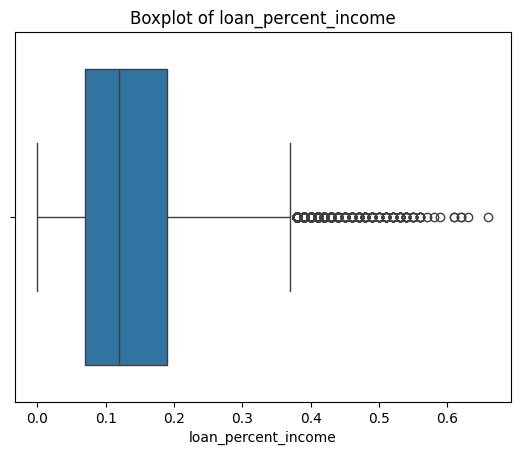

Insight: Loan amounts are often 5-15% of income.
Reason: Indicates affordability and repayment risk.


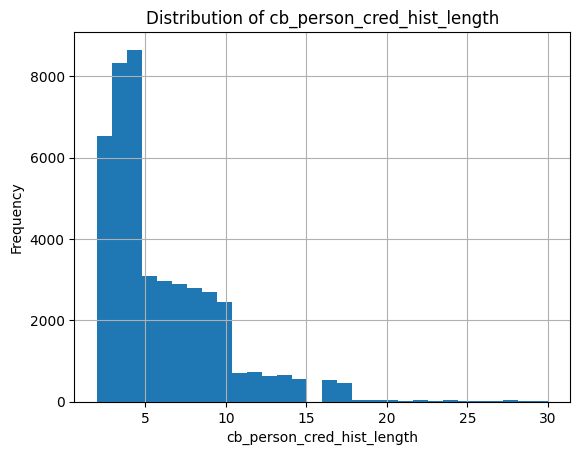

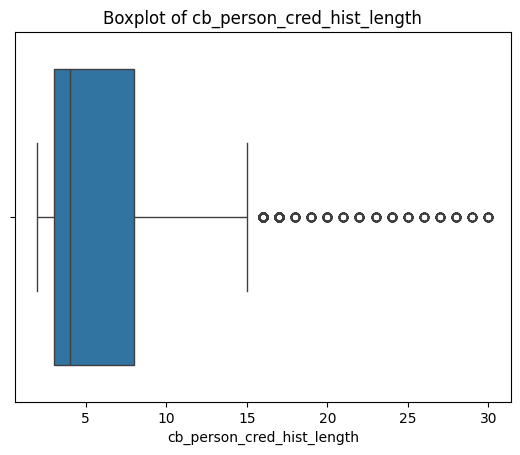

Insight: Most of the applicants have short credit history.
REason: Short credit history might correlate with younger age and lower approval chances.


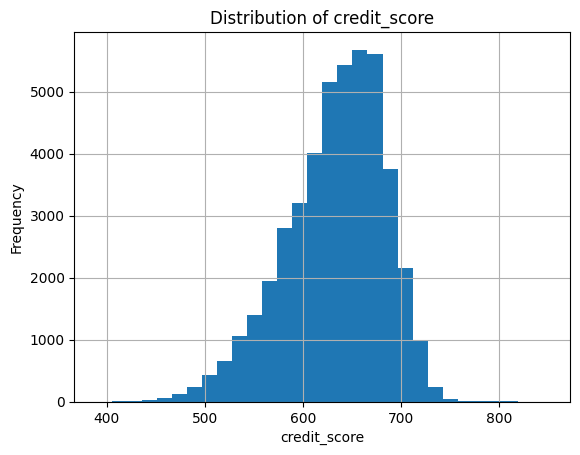

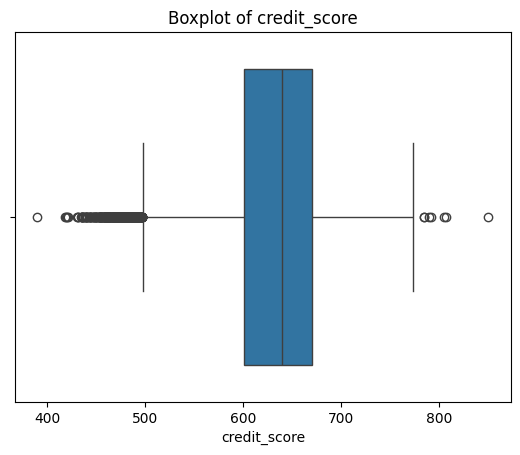

Insight: Most credit score cluster between 600-700.
Reason: Scores below 650 may negatively impact approval loans.


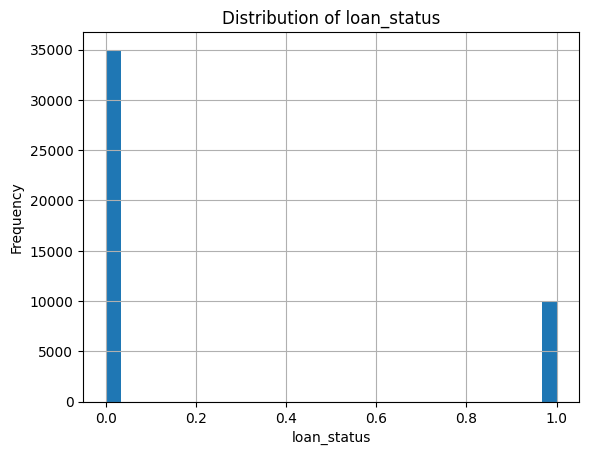

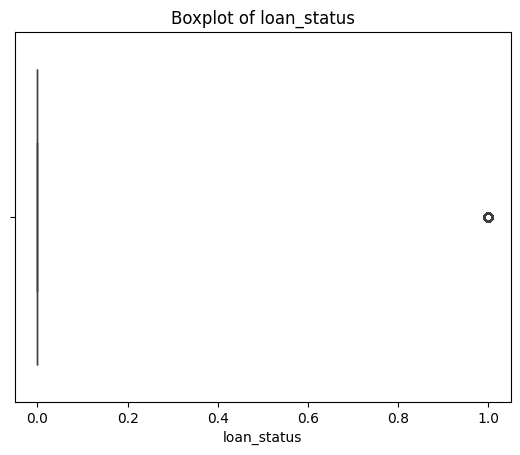

In [60]:
numerical_cols=df.select_dtypes(include=['int64','float']).columns

for col in numerical_cols:
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    if col=='person_age':
        print('Insight: Most of the applicants are in their 20s and 30s.\nReason: Younger applicants may have lower credit histories or incomes, which could influence approval decisions.')
    elif col=='person_income':
        print('Insight: Income is highly right skewed.\nReason: Income varies widely.')
    elif col=='person_emp_exp':
        print('Insight: Most applicants have less experience.\nReason: Most applicants are entry-level, likely reflecting a younger or less experienced workforce applying for loans.')
    elif col=='loan_amnt':
        print('Insight: Majority of loans are under 10000.\nReason: Indicates applicants are mostly requesting small to mid-sized personal or educational loans.')
    elif col=='loan_int_rate':
        print('Insight: Interest rate is between 10-12.\nReason: Might be useful to study how interest rate affects loan approval.')
    elif col=='loan_percent_income':
        print('Insight: Loan amounts are often 5-15% of income.\nReason: Indicates affordability and repayment risk.')
    elif col=='cb_person_cred_hist_length':
        print('Insight: Most of the applicants have short credit history.\nREason: Short credit history might correlate with younger age and lower approval chances.')
    elif col=='credit_score':
        print('Insight: Most credit score cluster between 600-700.\nReason: Scores below 650 may negatively impact approval loans.')

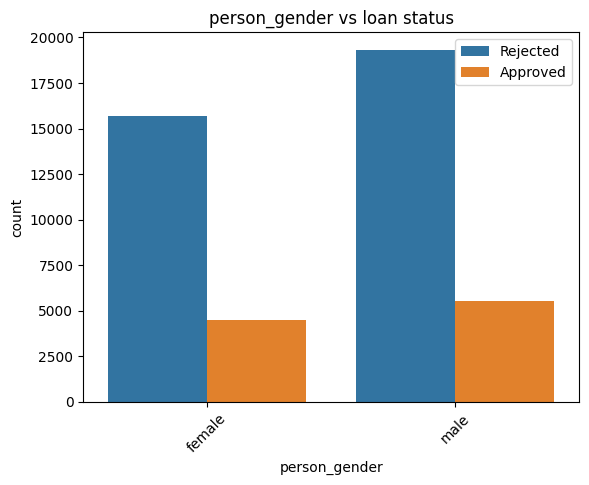

Insight: Approval rates are slightly higher for male applicants.
Reason: This may reflect income or employment differences.


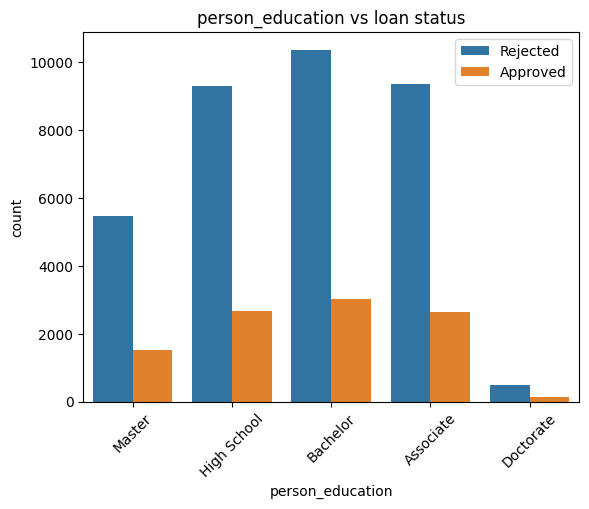

Insight: Education level has a moderate impact on approval.
Reason: Higher education may correlate with better income and job stability, affecting approval.


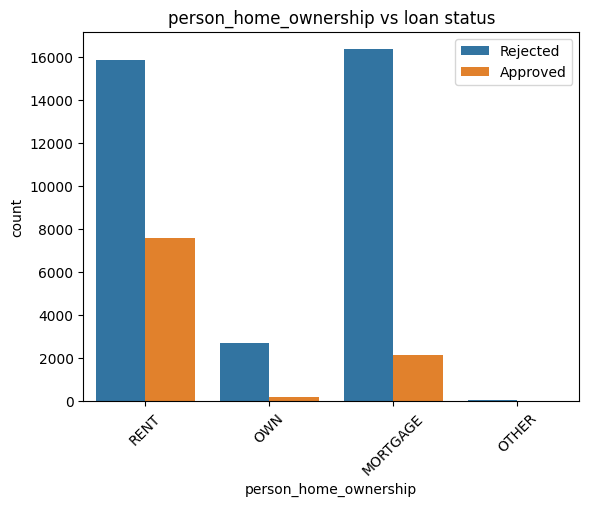

Insight: Homeowners are more likely to be approved.
Reason:  Home ownership is often a signal of financial stability and creditworthiness.


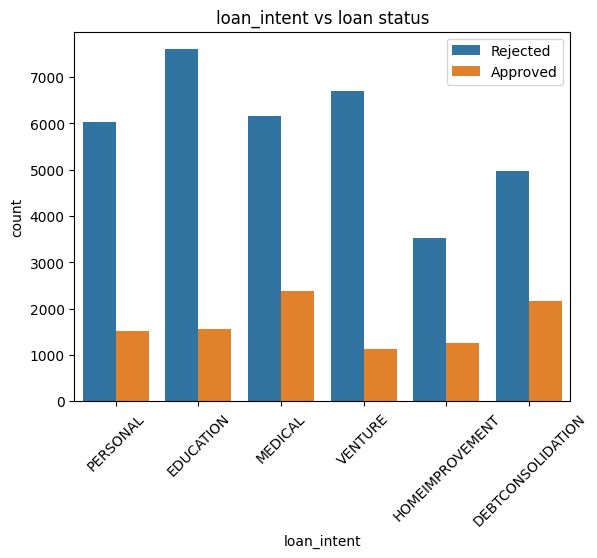

Insight: Applicants with medical or debt consolidation loan intent are approved more often.
Reason: Loan purpose strongly influences approval.


In [63]:
categorical=['person_gender','person_education','person_home_ownership','loan_intent']

for col in categorical:
    sns.countplot(x=col,hue='loan_status',data=df)
    plt.title(f'{col} vs loan status')
    plt.xticks(rotation=45)
    plt.legend(['Rejected','Approved'])
    plt.show()

    if col=='person_gender':
        print('Insight: Approval rates are slightly higher for male applicants.\nReason: This may reflect income or employment differences.')
    elif col=='person_education':
        print('Insight: Education level has a moderate impact on approval.\nReason: Higher education may correlate with better income and job stability, affecting approval.')
    elif col=='person_home_ownership':
        print('Insight: Homeowners are more likely to be approved.\nReason:  Home ownership is often a signal of financial stability and creditworthiness.')
    elif col=='loan_intent':
        print('Insight: Applicants with medical or debt consolidation loan intent are approved more often.\nReason: Loan purpose strongly influences approval.')

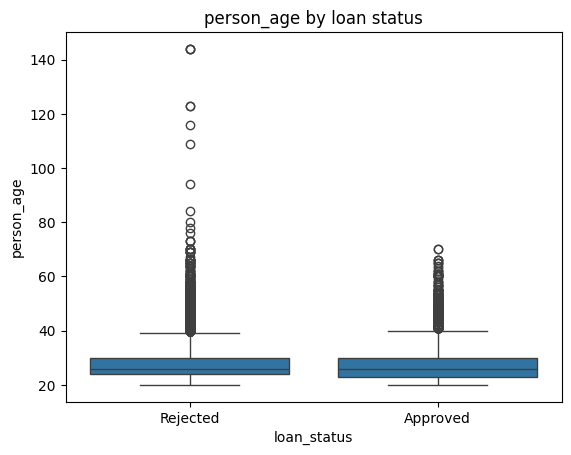

Insight: Rejected applicants has more older applicants.
Reason: Older applicants may face rejection due to limited income, higher debt, or nearing retirement.


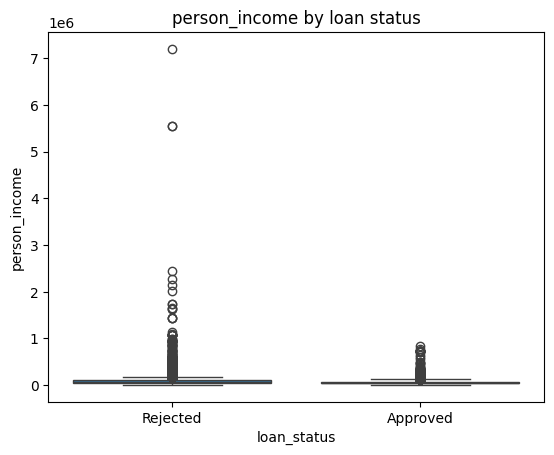

Insight: Most approved people have low to moderate income.
Reason: High income doesnt ensure approval.


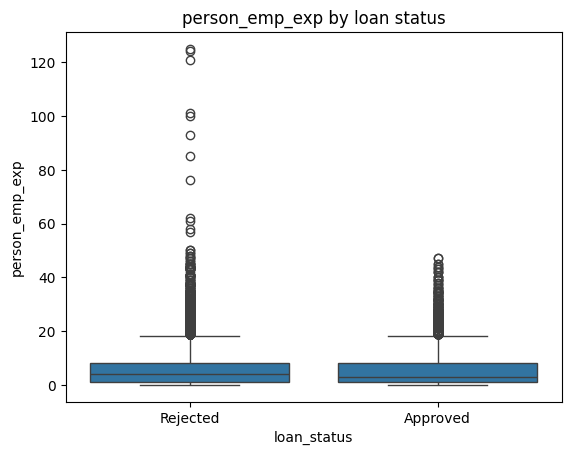

Insight: More experienced applicants are more likely to be approved.
Reason: Employment experience may indicate job stability and income reliability.


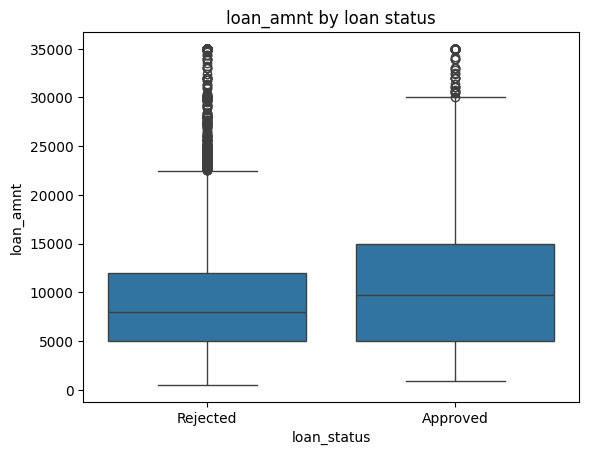

Insight: Higher loan amounts are more likely to be approved.
Reason: Lenders may approve higher loan amounts for applicants with stronger financial profiles.


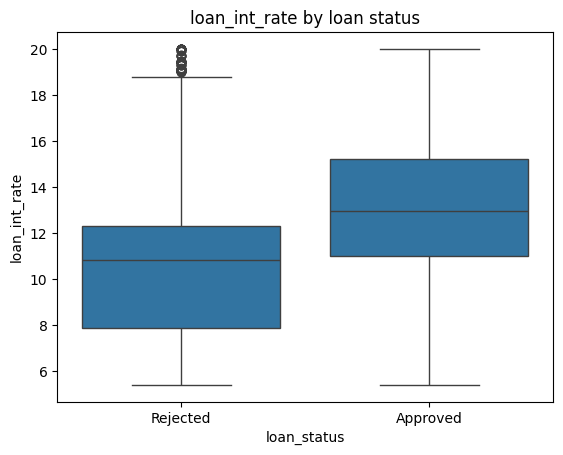

Insight: Loans having high interest rate is more likely to be approved.
Reason: Lenders compensate for higher risk by charging more interest.


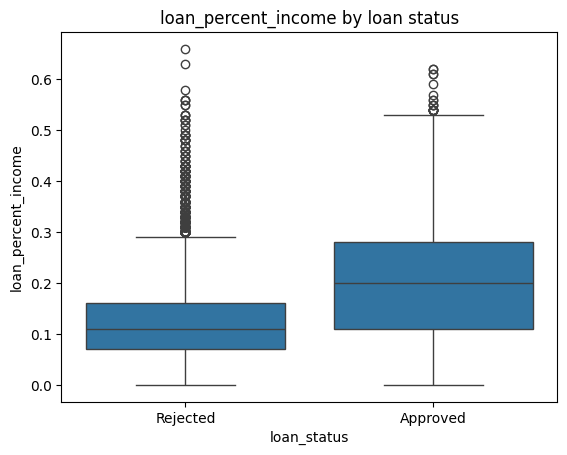

Insight: Most of the applicants are approved with high loan percent income.
Reason: May be their income is still sufficient to cover the loan amount.


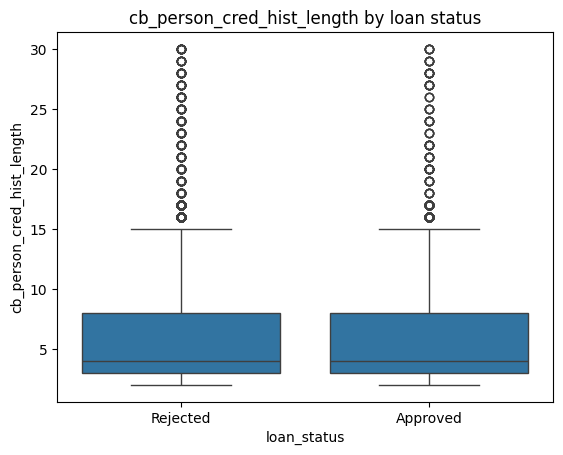

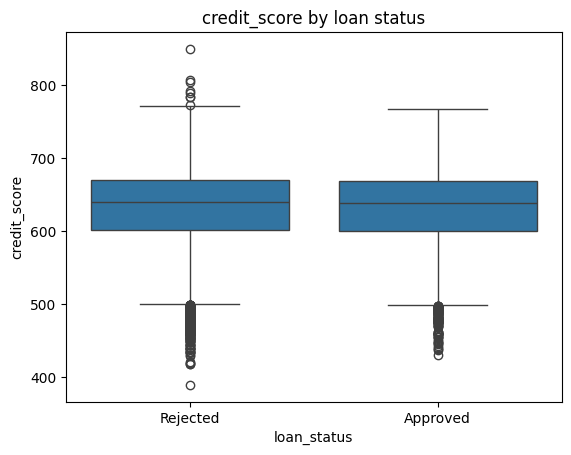

Insight: Higher credit score increases the chances of approval.
Reason: It is not only the deciding factor, because there are rejections for high credit score.


In [64]:
numerical=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']

for col in numerical:
    sns.boxplot(x='loan_status',y=col,data=df)
    plt.title(f'{col} by loan status')
    plt.xticks([0,1],['Rejected','Approved'])
    plt.show()

    if col=='person_age':
        print('Insight: Rejected applicants has more older applicants.\nReason: Older applicants may face rejection due to limited income, higher debt, or nearing retirement.')
    elif col=='person_income':
        print('Insight: Most approved people have low to moderate income.\nReason: High income doesnt ensure approval.')
    elif col=='person_emp_exp':
        print('Insight: More experienced applicants are more likely to be approved.\nReason: Employment experience may indicate job stability and income reliability.')
    elif col=='loan_amnt':
        print('Insight: Higher loan amounts are more likely to be approved.\nReason: Lenders may approve higher loan amounts for applicants with stronger financial profiles.')
    elif col=='loan_int_rate':
        print('Insight: Loans having high interest rate is more likely to be approved.\nReason: Lenders compensate for higher risk by charging more interest.')
    elif col=='loan_percent_income':
        print('Insight: Most of the applicants are approved with high loan percent income.\nReason: May be their income is still sufficient to cover the loan amount.')
    elif col=='credit_score':
        print('Insight: Higher credit score increases the chances of approval.\nReason: It is not only the deciding factor, because there are rejections for high credit score.')

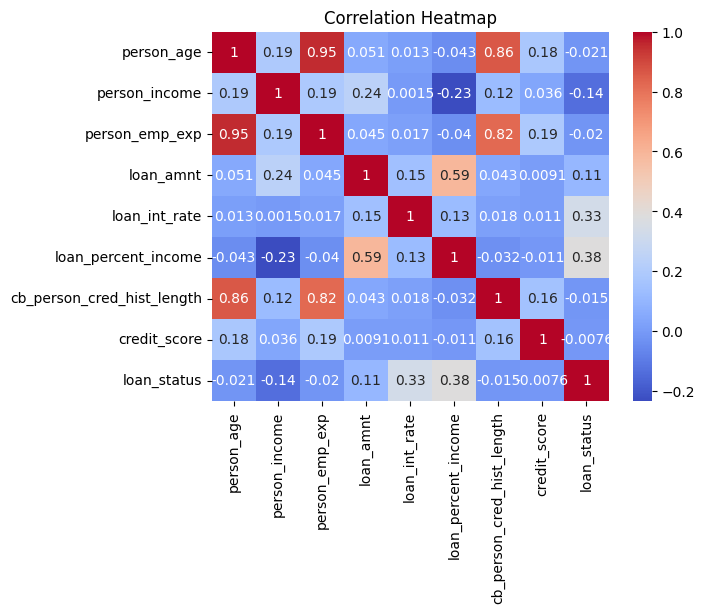

Insight: 1) Older peoples tend to have more employment experience.
2)Higher income reduces the share iof income used for loans.
3)Income to loan ratio nay slightly increase loan denial.


In [65]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print('Insight: 1) Older peoples tend to have more employment experience.\n2)Higher income reduces the share iof income used for loans.\n3)Income to loan ratio nay slightly increase loan denial.')

In [39]:
def experience_years(years):
    if years<=2:
        return 'Entry'
    elif years<=5:
        return 'Junior'
    elif years<=10:
        return 'Mid'
    else:
        return 'Senior'

df['emp_exp_level']=df['person_emp_exp'].apply(experience_years)

In [15]:
df['age_group']=pd.cut(df['person_age'],bins=[18,25,35,45,60,100,150],labels=['18-25','26-35','36-45','46-60','60-100','100+'])

In [16]:
df['income_loan_ratio']=df['person_income']/df['loan_amnt']

In [17]:
df['high_int_rate']=df['loan_int_rate'].apply(lambda x: 1 if x>15 else 0)

In [18]:
df['cred_hist_bucket']=pd.cut(df['cb_person_cred_hist_length'],bins=[0,2,5,10,20,30],labels=['<2 yrs','2-5 yrs','5-10 yrs','10-20 yrs','20+ yrs'])

In [19]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
emp_exp_level                     0
age_group                         0
income_loan_ratio                 0
high_int_rate                     0
cred_hist_bucket                  0
dtype: int64

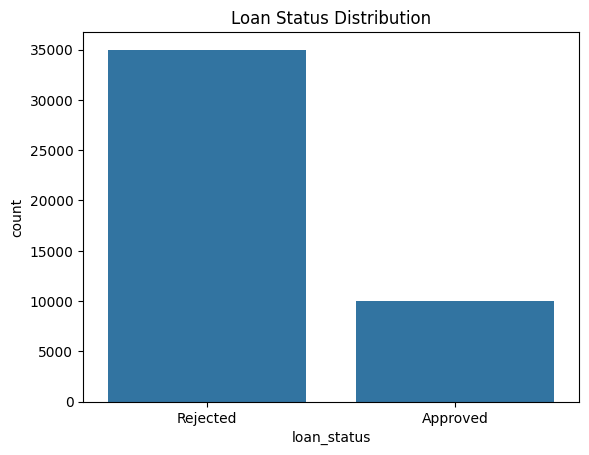

In [20]:
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

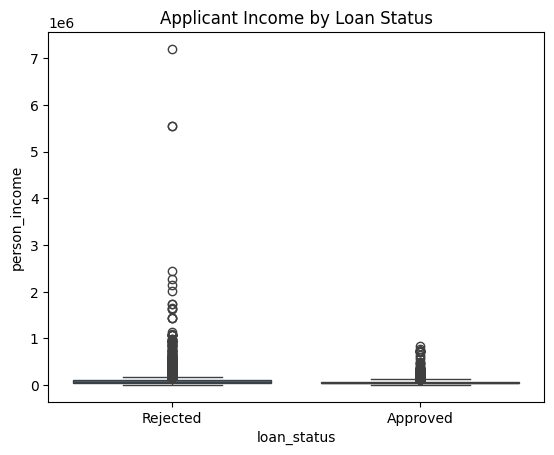

In [21]:
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title('Applicant Income by Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

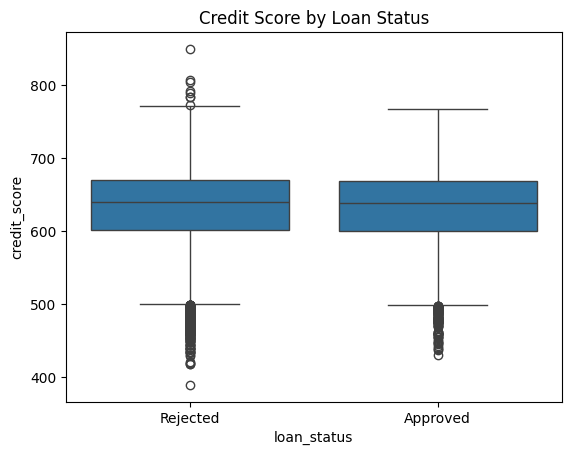

In [22]:
sns.boxplot(x='loan_status', y='credit_score', data=df)
plt.title('Credit Score by Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

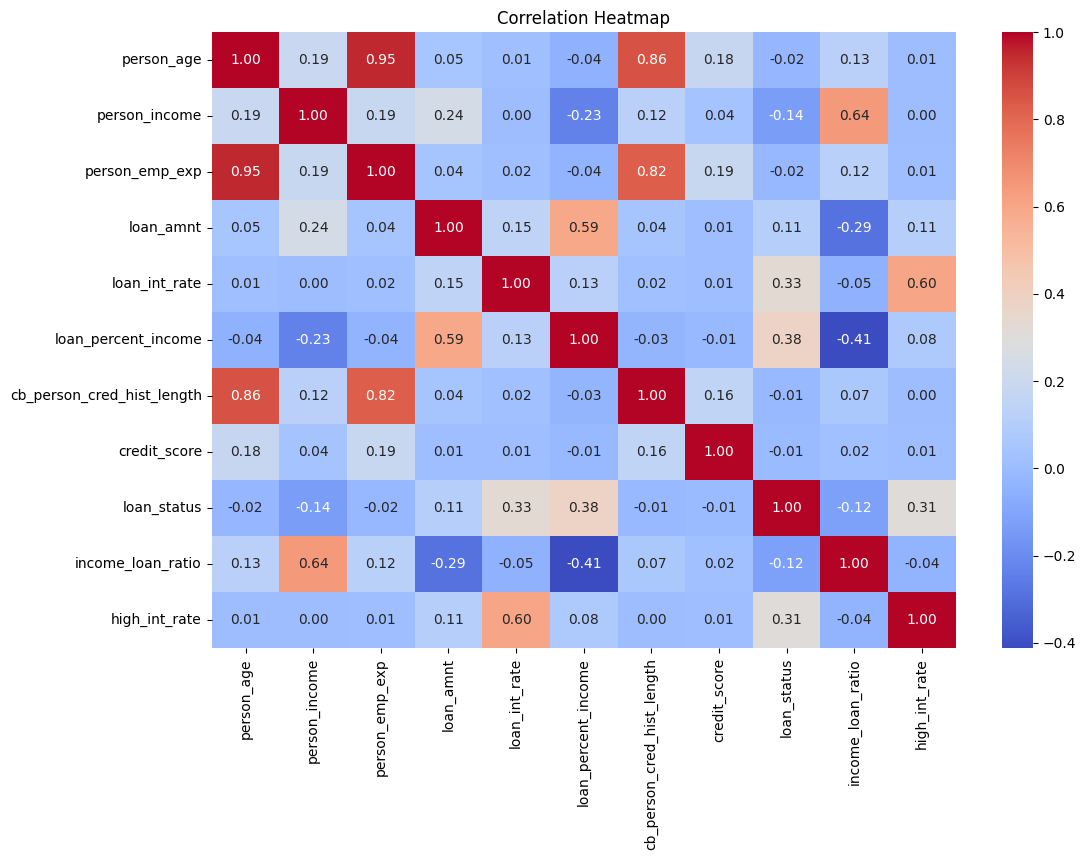

In [23]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print('Insight: 

In [1]:
## 📊 EDA Summary Report

### 🎯 Objective
Analyze loan application data to discover patterns affecting loan approvals.

### 🔍 Key Findings
- Credit score has a strong positive correlation with loan approval.
- Higher loan amounts, interest rates, and loan-to-income ratios are associated with rejections.
- Most applicants are Bachelor's degree holders with entry/junior-level experience.
- Applicants with previous loan defaults are more likely to be rejected.

### 📌 Implications
Financial reliability indicators (credit score, debt ratio) are crucial for approval. These insights will inform feature selection for predictive modeling.

### ⚠️ Limitations
Some missing data and class imbalance may impact modeling accuracy.

### 🚀 Next Steps
# - Clean missing data
# - Encode categorical features
# - Train ML models to predict loan approval


SyntaxError: unterminated string literal (detected at line 9) (2149890602.py, line 9)